In [1]:
!pip install biopython


   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 27.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from Bio import SeqIO

def cargar_secuencia(fichero_fasta):
    registro = SeqIO.read(fichero_fasta, "fasta")
    secuencia = str(registro.seq).upper()
    return secuencia

# Cargar las tres secuencias
gato_seq = cargar_secuencia("sequencegato.fasta")
leon_seq = cargar_secuencia("sequenceleon.fasta")
tigre_seq = cargar_secuencia("sequencetigre.fasta")

# Verificar longitudes
print("Longitudes:")
print("Gato:", len(gato_seq))
print("León:", len(leon_seq))
print("Tigre:", len(tigre_seq))


Longitudes:
Gato: 17009
León: 16723
Tigre: 16783


In [3]:
from collections import Counter
import pandas as pd

def contar_kmers(secuencia, k):
    secuencia = secuencia.upper()
    total = len(secuencia) - k + 1
    kmers = [secuencia[i:i+k] for i in range(total)]
    conteo = Counter(kmers)
    # Normalización
    frecuencias = {kmer: conteo[kmer]/total for kmer in conteo}
    return frecuencias

# Valores de k que queremos probar
ks = [2, 3, 4]

# Guardamos todos los resultados
resultados = {}

for k in ks:
    resultados[k] = {
        "Gato": contar_kmers(gato_seq, k),
        "León": contar_kmers(leon_seq, k),
        "Tigre": contar_kmers(tigre_seq, k),
    }

# Mostramos los resultados para k = 2 (Punto 1b)
print("\n🔹 Frecuencias de k-mers para k = 2:\n")

df_k2 = pd.DataFrame(resultados[2]).fillna(0).T  # filas: especie, columnas: k-mers
print(df_k2.head(10))  # muestra solo las primeras filas



🔹 Frecuencias de k-mers para k = 2:

             GG        GA        AC        CT        TA        AA        AT  \
Gato   0.028575  0.042627  0.082843  0.077728  0.098189  0.101423  0.091075   
León   0.028944  0.041502  0.081569  0.079656  0.098672  0.104413  0.091496   
Tigre  0.026755  0.041473  0.080384  0.077404  0.101716  0.105589  0.094566   

             TG        TC        CA        AG        GC        CC        GT  \
Gato   0.038394  0.064440  0.083667  0.050564  0.037982  0.076611  0.032279   
León   0.036359  0.066140  0.082586  0.049695  0.038213  0.075709  0.030080   
Tigre  0.036348  0.064653  0.082112  0.050352  0.036408  0.075974  0.030807   

             TT        CG  
Gato   0.069732  0.023871  
León   0.071224  0.023741  
Tigre  0.073472  0.021988  


Resumen general de frecuencias:
   k Especie  N_kmers  Max_Freq  Mean_Freq
0  2    Gato       16  0.101423   0.062500
1  2    León       16  0.104413   0.062500
2  2   Tigre       16  0.105589   0.062500
3  3    Gato       64  0.032869   0.015625
4  3    León       64  0.034747   0.015625
5  3   Tigre       64  0.034503   0.015625
6  4    Gato      256  0.012113   0.003906
7  4    León      256  0.013577   0.003906
8  4   Tigre      256  0.013290   0.003906


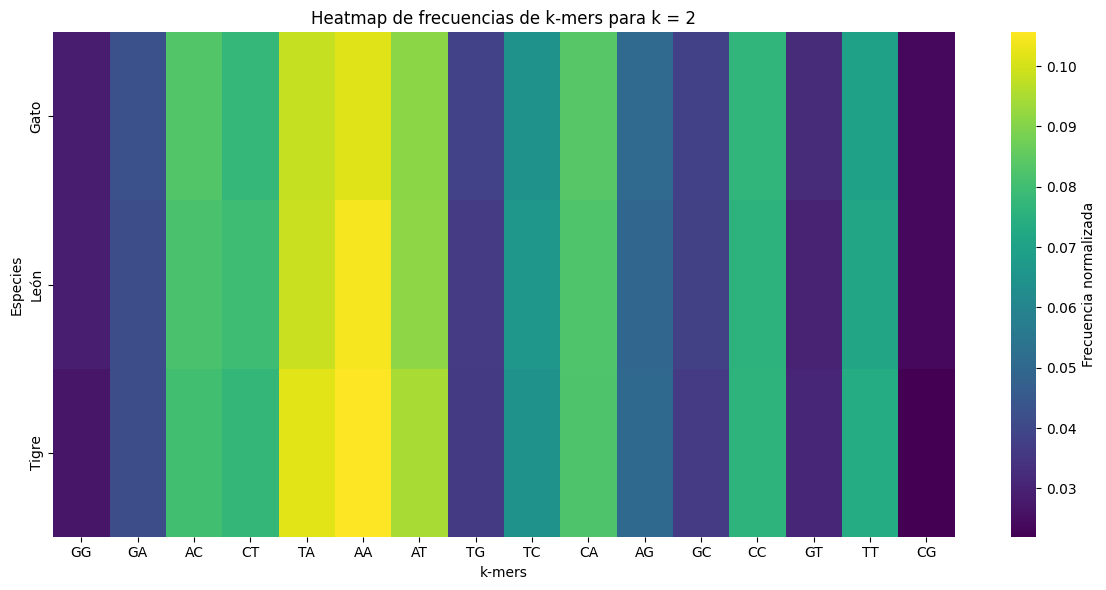

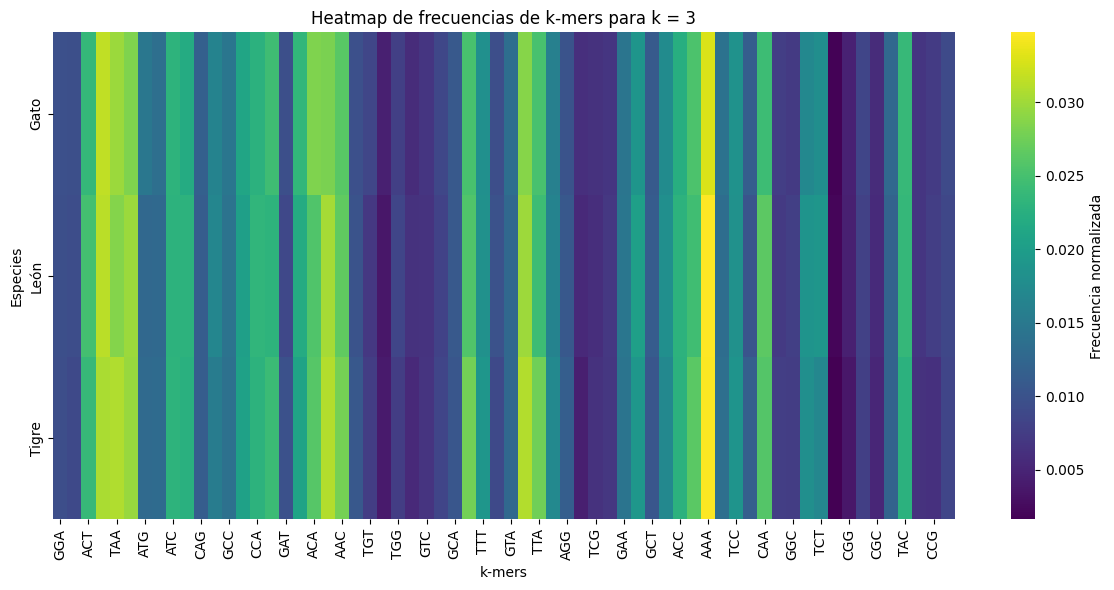

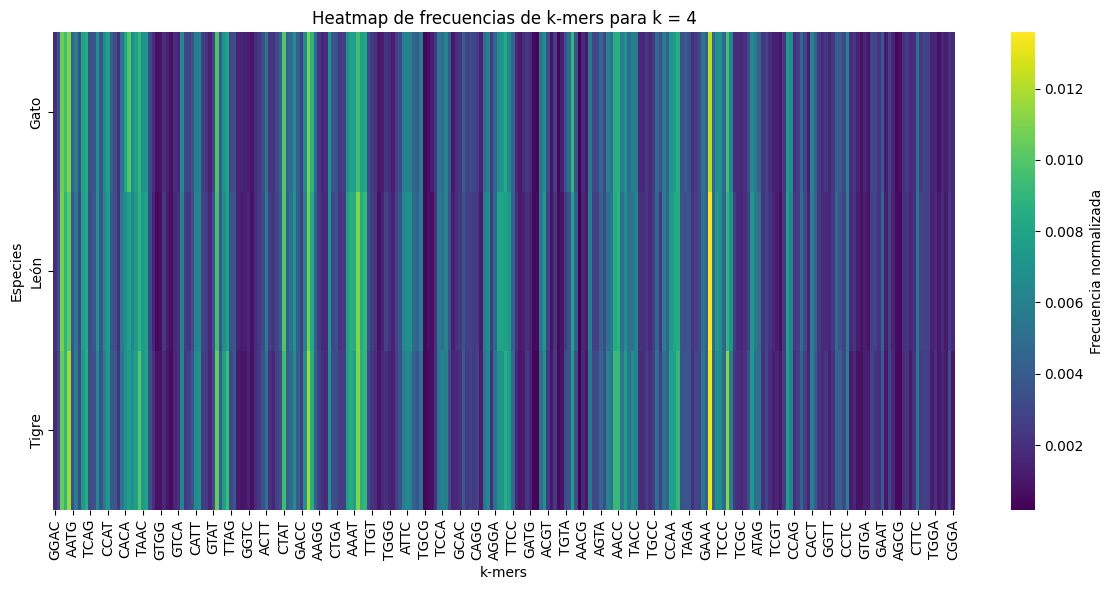

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


def resumen_frecuencias(resultados, ks, especies):
    resumen = []
    for k in ks:
        for especie in especies:
            freqs = resultados[k][especie]
            n_kmers = len(freqs)
            max_freq = max(freqs.values()) if freqs else 0
            promedio_freq = sum(freqs.values()) / n_kmers if n_kmers > 0 else 0
            resumen.append({
                "k": k,
                "Especie": especie,
                "N_kmers": n_kmers,
                "Max_Freq": max_freq,
                "Mean_Freq": promedio_freq
            })
    return pd.DataFrame(resumen)


especies = ["Gato", "León", "Tigre"]
df_resumen = resumen_frecuencias(resultados, ks, especies)

print("Resumen general de frecuencias:")
print(df_resumen)

# heatmaps
for k in ks:
    df = pd.DataFrame(resultados[k]).fillna(0).T  
    plt.figure(figsize=(12, 6))
    sns.heatmap(df, cmap="viridis", cbar_kws={'label': 'Frecuencia normalizada'})
    plt.title(f"Heatmap de frecuencias de k-mers para k = {k}")
    plt.xlabel("k-mers")
    plt.ylabel("Especies")
    plt.tight_layout()
    plt.show()


In [5]:
def contar_kmers_normalizados(secuencia, k):
    secuencia = secuencia.upper()
    L = len(secuencia)
    N = L - k - 1  # según enunciado
    kmers = [secuencia[i:i+k] for i in range(L - k + 1)]  # total de k-mers (ojo que es L-k+1)
    conteo = Counter(kmers)
    frecuencias_norm = {kmer: conteo[kmer]/N for kmer in conteo}
    return frecuencias_norm

# Aplicamos para k=2 en cada organismo
k = 2
frecs_norm = {
    "Gato": contar_kmers_normalizados(gato_seq, k),
    "León": contar_kmers_normalizados(leon_seq, k),
    "Tigre": contar_kmers_normalizados(tigre_seq, k),
}

# Convertimos a DataFrame para visualizar
df_norm = pd.DataFrame(frecs_norm).fillna(0).T  # especies filas, k-mers columnas

print("Frecuencias normalizadas con N = L - k - 1 para k=2:")
print(df_norm.head(10))


Frecuencias normalizadas con N = L - k - 1 para k=2:
             GG        GA        AC        CT        TA        AA        AT  \
Gato   0.028578  0.042632  0.082853  0.077737  0.098201  0.101435  0.091085   
León   0.028947  0.041507  0.081579  0.079665  0.098684  0.104426  0.091507   
Tigre  0.026758  0.041478  0.080393  0.077414  0.101728  0.105602  0.094577   

             TG        TC        CA        AG        GC        CC        GT  \
Gato   0.038398  0.064448  0.083676  0.050570  0.037987  0.076620  0.032283   
León   0.036364  0.066148  0.082596  0.049701  0.038218  0.075718  0.030084   
Tigre  0.036353  0.064660  0.082122  0.050358  0.036412  0.075983  0.030810   

             TT        CG  
Gato   0.069740  0.023874  
León   0.071232  0.023744  
Tigre  0.073480  0.021990  


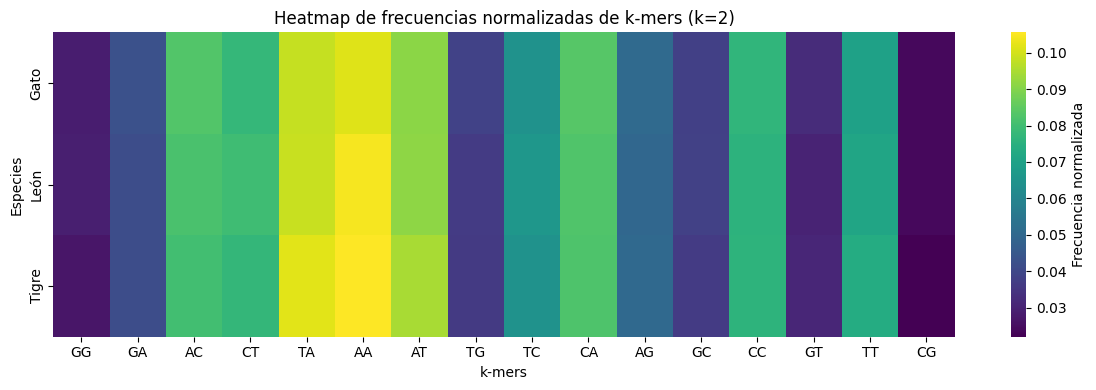

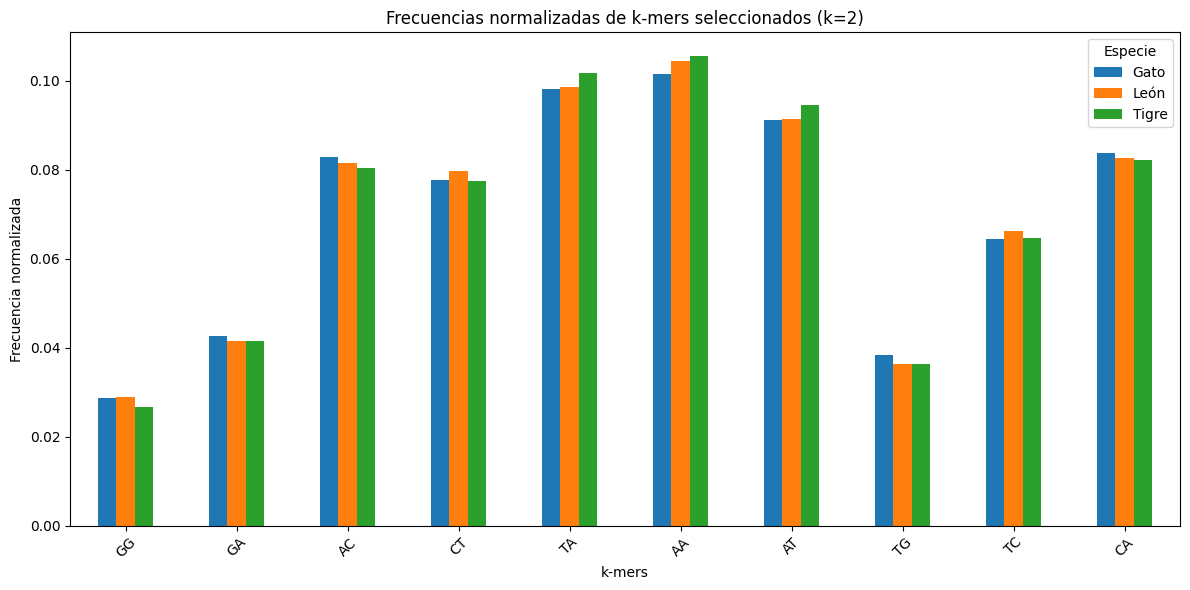

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Guardar en CSV
df_norm.to_csv("frecuencias_k2_normalizadas.csv")


# Graficar heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(df_norm, cmap="viridis", cbar_kws={'label': 'Frecuencia normalizada'})
plt.title("Heatmap de frecuencias normalizadas de k-mers (k=2)")
plt.xlabel("k-mers")
plt.ylabel("Especies")
plt.tight_layout()
plt.show()

# Graficar barras para algunas k-mers representativas
k_mers_representativos = df_norm.columns[:10]  # las primeras 10 k-mers para no saturar
df_norm_subset = df_norm[k_mers_representativos]

df_norm_subset.T.plot(kind='bar', figsize=(12,6))
plt.title("Frecuencias normalizadas de k-mers seleccionados (k=2)")
plt.ylabel("Frecuencia normalizada")
plt.xlabel("k-mers")
plt.xticks(rotation=45)
plt.legend(title="Especie")
plt.tight_layout()
plt.show()


Tabla de distancias y correlaciones entre especies (k=2):
  Especie 1 Especie 2  Distancia Manhattan  Distancia Euclídea  \
0      Gato      León             0.019232            0.005745   
1      Gato     Tigre             0.030276            0.009060   
2      León     Tigre             0.022375            0.006797   

   Coef. Correlación (Pearson)  
0                     0.998783  
1                     0.998021  
2                     0.998487  


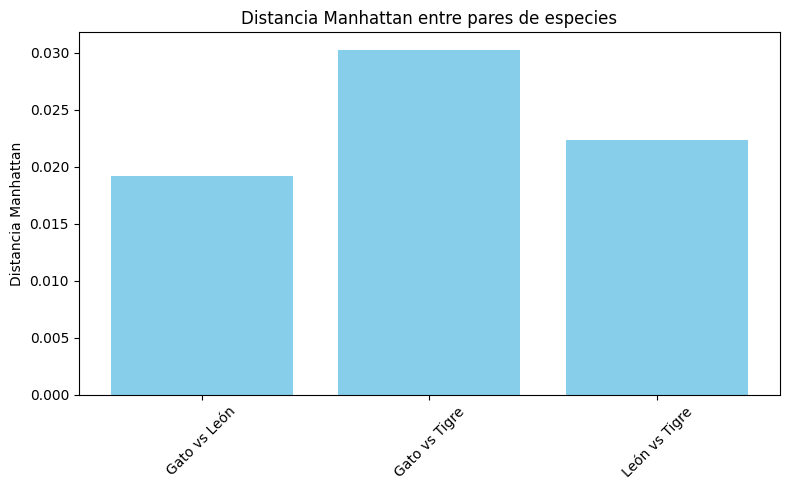

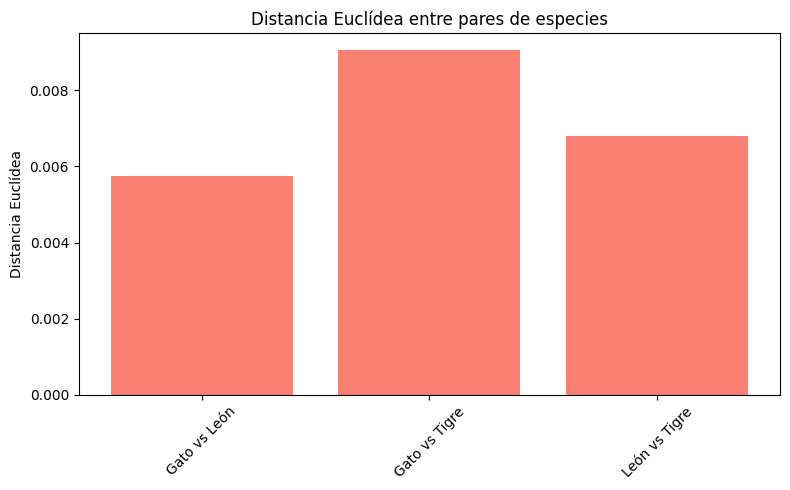

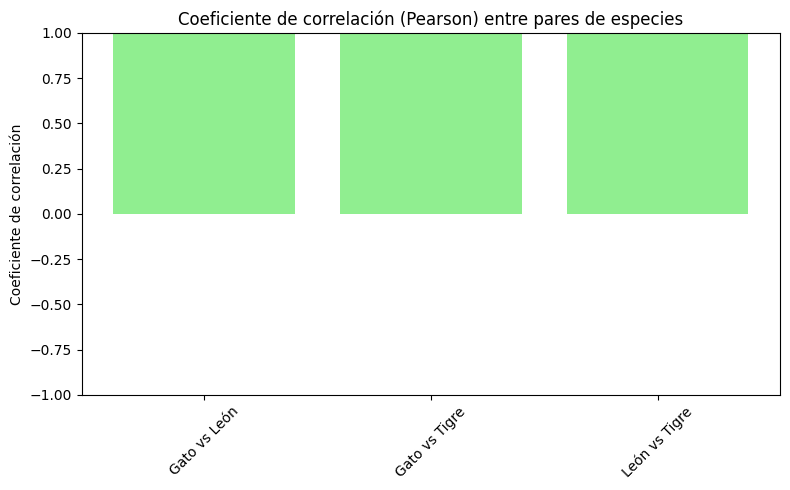

In [12]:
from scipy.spatial.distance import cityblock, euclidean
from scipy.stats import pearsonr

especies = df_norm.index.tolist()
pares = [(especies[i], especies[j]) for i in range(len(especies)) for j in range(i+1, len(especies))]

resultados_distancias = []

for sp1, sp2 in pares:
    vec1 = df_norm.loc[sp1].values
    vec2 = df_norm.loc[sp2].values
    
    dist_manhattan = cityblock(vec1, vec2)
    dist_euclid = euclidean(vec1, vec2)
    corr_pearson, _ = pearsonr(vec1, vec2)
    
    resultados_distancias.append({
        "Especie 1": sp1,
        "Especie 2": sp2,
        "Distancia Manhattan": dist_manhattan,
        "Distancia Euclídea": dist_euclid,
        "Coef. Correlación (Pearson)": corr_pearson
    })

df_distancias = pd.DataFrame(resultados_distancias)
# Guardar en CSV
df_distancias.to_csv("distancias_correlacion_k2.csv", index=False)

# Mostrar tabla
print("Tabla de distancias y correlaciones entre especies (k=2):")
print(df_distancias)

import matplotlib.pyplot as plt

# Distancias Manhattan
plt.figure(figsize=(8,5))
plt.bar(df_distancias["Especie 1"] + " vs " + df_distancias["Especie 2"],
        df_distancias["Distancia Manhattan"], color='skyblue')
plt.title("Distancia Manhattan entre pares de especies")
plt.ylabel("Distancia Manhattan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distancias Euclídea
plt.figure(figsize=(8,5))
plt.bar(df_distancias["Especie 1"] + " vs " + df_distancias["Especie 2"],
        df_distancias["Distancia Euclídea"], color='salmon')
plt.title("Distancia Euclídea entre pares de especies")
plt.ylabel("Distancia Euclídea")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
plt.bar(df_distancias["Especie 1"] + " vs " + df_distancias["Especie 2"],
        df_distancias["Coef. Correlación (Pearson)"], color='lightgreen')
plt.title("Coeficiente de correlación (Pearson) entre pares de especies")
plt.ylabel("Coeficiente de correlación")
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()



In [1]:
!pip install biopython matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Matriz de distancias:
Gato    0.000000
Leon    0.108586    0.000000
Tigre   0.114635    0.104769    0.000000
    Gato    Leon    Tigre


<Figure size 800x500 with 0 Axes>

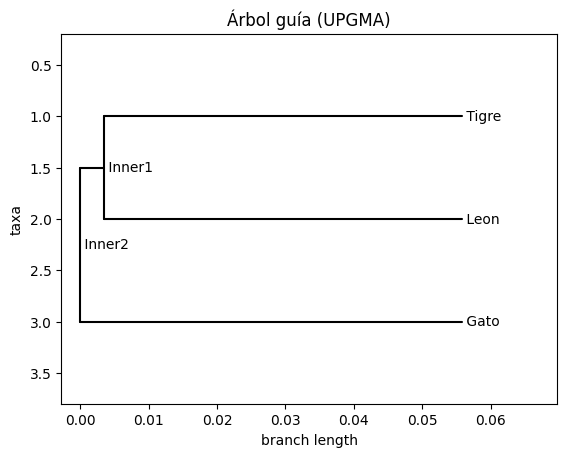

<Figure size 800x500 with 0 Axes>

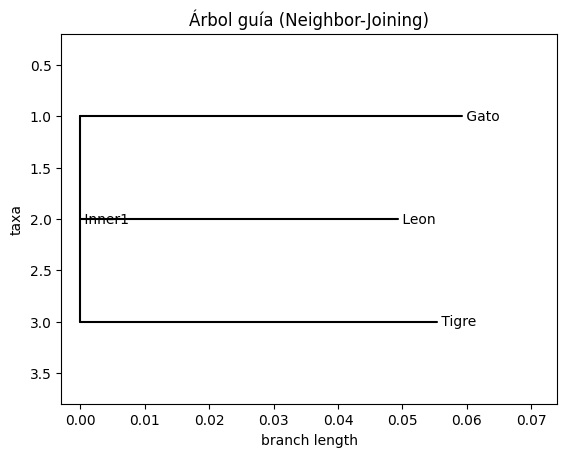

1

In [27]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

# Cargar alineamiento
alignment = AlignIO.read("alineamiento.aln", "clustal")

# Reemplazar IDs por nombres comunes
id_to_name = {
    "U20753.1": "Gato",
    "KP202270.1": "Leon",
    "KP202271.1": "Tigre"
}
for record in alignment:
    record.id = id_to_name.get(record.id, record.id)

# Calcular matriz de distancias
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)

print("\nMatriz de distancias:")
print(dm)

# Construcción de árboles guía
constructor = DistanceTreeConstructor()
tree_upgma = constructor.upgma(dm)
tree_nj = constructor.nj(dm)

# Visualizar árbol UPGMA
plt.figure(figsize=(8, 5))
Phylo.draw(tree_upgma, do_show=False)
plt.title("Árbol guía (UPGMA)")
plt.show()

# Visualizar árbol NJ
plt.figure(figsize=(8, 5))
Phylo.draw(tree_nj, do_show=False)
plt.title("Árbol guía (Neighbor-Joining)")
plt.show()

# Guardar árbol como Newick
Phylo.write(tree_upgma, "arbol_guia.nwk", "newick")


In [ ]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align import AlignInfo

secuencias = {
    "Gato": SeqIO.read("sequencegato.fasta", "fasta"),
    "Leon": SeqIO.read("sequenceleon.fasta", "fasta"),
    "Tigre": SeqIO.read("sequencetigre.fasta", "fasta")
}

# Configurar alineador 
aligner = PairwiseAligner()
aligner.mode = 'global'
aligner.open_gap_score = -2
aligner.extend_gap_score = -1
aligner.match_score = 1
aligner.mismatch_score = -1

#  Nodo del árbol guía 
class Nodo:
    def __init__(self, name=None, left=None, right=None):
        self.name = name
        self.left = left
        self.right = right
        self.seq = None  # secuencia alineada final

def reconstruir_alineacion(alignment):
    aligned_seq1 = []
    aligned_seq2 = []
    seq1 = alignment.sequences[0]
    seq2 = alignment.sequences[1]
    aligned_positions = alignment.aligned

    idx1, idx2 = 0, 0

    for (start1, end1), (start2, end2) in zip(aligned_positions[0], aligned_positions[1]):
        
        while idx1 < start1:
            aligned_seq1.append(seq1[idx1])
            aligned_seq2.append("-")
            idx1 += 1
        while idx2 < start2:
            aligned_seq1.append("-")
            aligned_seq2.append(seq2[idx2])
            idx2 += 1

        # Añadir segmento alineado
        aligned_seq1.extend(seq1[start1:end1])
        aligned_seq2.extend(seq2[start2:end2])
        idx1 = end1
        idx2 = end2

    # Rellenar final
    while idx1 < len(seq1):
        aligned_seq1.append(seq1[idx1])
        aligned_seq2.append("-")
        idx1 += 1
    while idx2 < len(seq2):
        aligned_seq1.append("-")
        aligned_seq2.append(seq2[idx2])
        idx2 += 1

    return "".join(aligned_seq1), "".join(aligned_seq2)

# ------------- Alineamiento recursivo usando árbol guía -------------
def alinear_nodos(node):
    if node.left is None and node.right is None:
        node.seq = str(secuencias[node.name].seq)
        return node.seq

    seq_left = alinear_nodos(node.left)
    seq_right = alinear_nodos(node.right)

    alignment = aligner.align(seq_left, seq_right)[0]
    aligned_left, aligned_right = reconstruir_alineacion(alignment)

    # Guardar alineaciones en hijos
    node.left.seq = aligned_left
    node.right.seq = aligned_right

    # Crear secuencia consenso para nodo actual
    aln = MultipleSeqAlignment([
        SeqRecord(Seq(aligned_left), id="left"),
        SeqRecord(Seq(aligned_right), id="right")
    ])
    consensus = AlignInfo.SummaryInfo(aln).dumb_consensus()
    node.seq = str(consensus)

    return node.seq

def insertar_huecos(secuencia, posiciones):
    for pos in posiciones:
        secuencia = secuencia[:pos] + '-' + secuencia[pos:]
    return secuencia

# ------------- Construir árbol guía -------------
nodo_gato = Nodo(name="Gato")
nodo_leon = Nodo(name="Leon")
nodo_tigre = Nodo(name="Tigre")

nodo_GL = Nodo(left=nodo_gato, right=nodo_leon)
nodo_raiz = Nodo(left=nodo_GL, right=nodo_tigre)

# ------------- Alinear todo el árbol -------------
alinear_nodos(nodo_raiz)

# ------------- Igualar longitudes de secuencias alineadas -------------
seqs = [nodo_gato.seq, nodo_leon.seq, nodo_tigre.seq]
max_len = max(len(s) for s in seqs)

# Rellenar con gaps al final
nodo_gato.seq = nodo_gato.seq.ljust(max_len, "-")
nodo_leon.seq = nodo_leon.seq.ljust(max_len, "-")
nodo_tigre.seq = nodo_tigre.seq.ljust(max_len, "-")


final_alignment = MultipleSeqAlignment([
    SeqRecord(Seq(nodo_gato.seq), id="Gato"),
    SeqRecord(Seq(nodo_leon.seq), id="Leon"),
    SeqRecord(Seq(nodo_tigre.seq), id="Tigre")
])

# ------------- Guardar y mostrar alineamiento -------------
with open("alineamiento_arbol_guia.fasta", "w") as f:
    SeqIO.write(final_alignment, f, "fasta")



--- Alineamiento final completo (desde la posición 151) ---

>Gato
CGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTGTACACGTACACACGTACACACGTGTACACGTACACACGTACACACGTACACACGTGTACACGTACACACGTACACACGTACACACGTACACACGTACACACGTGTACACGTACACACGTACACACGTACACACGTACACACGTATACACGCGAACGCTTTAATTTAAGTAAATAACTAGCTTAATCAAACCCCCCTTACCCCCCGTTAACCTTATTTATAATAATACGTGCCTATTTATGTCTTGCCAAACCCCACAAACAAGACTAGACCGTACCTAAATATAAGGCCTAAGAAAACGCTTATAAGC-TTACCAATCCCCTATTATTACTAGCTACTAATACTAAATCATAACTCTGTTCGCAGTTATCTATAGATATACCGACCTGA-CTCTAATTCGTCCCTATCGAACAACATTTTACATGTCTACGTTAGCCCCACATCCCAGTTAATGTAGCTTAAACATATAAAGCAAGGCACTGAAAATGCCTAGATGAGTCGCCAGACTCCATAAACACAAAGGTTTGGTCCTGGCCTTTCCATTAGTTATTAATAAGATTACACATGCAAGCCTCCGCATCCCGGTGAAAATGCCCTCTAAGTCACCCAGTGACCTAAAGGAGCTGGTATCAAGCACACAACCACAGTAGCTCATAACACCTTGCTCAGCCACACCCCCACGGGATACAGCAGTGATAAAAATTAAGCCATGAATGAAAGTTCGACTAAGCTATATTAAACAAGGGTTGGTAAATTTCGTGCCAGCCACCGCGGCCATACGATTAACCCAAACTAATAGACCCACGGC

In [33]:
print("\n--- Alineamiento final ---\n")
for record in final_alignment:
    trimmed_seq = record.seq[330:420]  # Elimina las primeras 150 pb
    print(f">{record.id}\n{trimmed_seq}")



--- Alineamiento final ---

>Gato
CACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACACGTACACA
>Leon
--CGT--ACACGT--ACACGT--ACACGTACACACGTACACACGTATACACGT--ACACGT--ACACGTACACACGTA------TACAC-
>Tigre
CACGT--ACACGT--ACACGT--ACACGT--ACACGT--ACACGT--ACACGT--ACACGTACACACGTACACACGTACACACGTAC---
